In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from pandas.plotting import scatter_matrix

In [ ]:
company_ipo  = pd.read_csv("/content/company_ipo.csv")
data = company_ipo.copy()
data.head()

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,1,"Dec 21, 2021",NVAC,NorthView Acquisition,$10.00,$10.03,0.30%
1,2,"Dec 21, 2021",LSPR,Larkspur Health Acquisition,$10.00,$9.98,-0.20%
2,3,"Dec 21, 2021",SAGA,Sagaliam Acquisition,$10.00,$9.97,-0.30%
3,4,"Dec 17, 2021",RCAC,Revelstone Capital Acquisition,$10.00,$9.90,-1.00%
4,5,"Dec 17, 2021",APCA,AP Acquisition,$10.00,$10.11,1.10%


In [ ]:
data.isnull().sum()

ID              0
IPO Date        0
Symbol          0
Company Name    0
IPO Price       0
Current         0
Return          0
dtype: int64

In [ ]:
col = data.select_dtypes(exclude='object').columns
print(col)

Index(['ID'], dtype='object')


In [ ]:
data[cols] = data[cols].replace({'\$': ''}, regex=True)
data[cols] = data[cols].replace({'%':''},regex = True)

In [ ]:
data.head()

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,1.0,Dec 21 2021,NVAC,NorthView Acquisition,10.00,10.03,0.30
1,2.0,Dec 21 2021,LSPR,Larkspur Health Acquisition,10.00,9.98,-0.20
2,3.0,Dec 21 2021,SAGA,Sagaliam Acquisition,10.00,9.97,-0.30
3,4.0,Dec 17 2021,RCAC,Revelstone Capital Acquisition,10.00,9.90,-1.00
4,5.0,Dec 17 2021,APCA,AP Acquisition,10.00,10.11,1.10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1765 non-null   float64
 1   IPO Date      1765 non-null   object 
 2   Symbol        1765 non-null   object 
 3   Company Name  1765 non-null   object 
 4   IPO Price     1765 non-null   object 
 5   Current       1765 non-null   object 
 6   Return        1765 non-null   object 
dtypes: float64(1), object(6)
memory usage: 96.6+ KB


In [ ]:
data['IPO Date'] = pd.to_datetime(data['IPO Date'])
data['IPO Price'] = pd.to_numeric(data['IPO Price'])
data['Current'] = pd.to_numeric(data['Current'])
data['Return'] = pd.to_numeric(data['Return'])

In [ ]:
data.dtypes

ID                     float64
IPO Date        datetime64[ns]
Symbol                  object
Company Name            object
IPO Price              float64
Current                float64
Return                 float64
dtype: object

In [102]:
data.shape

(1765, 7)

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1765.0,883.000000,509.655930,1.0,442.00,883.00,1324.00,1765.00
IPO Price,1765.0,13.662436,11.310563,0.0,10.00,10.00,16.00,250.00
Current,1765.0,16.158261,24.207423,0.0,9.71,9.96,14.82,354.82
Return,1765.0,9.998028,105.417759,-97.5,-14.80,-1.70,3.00,1998.77


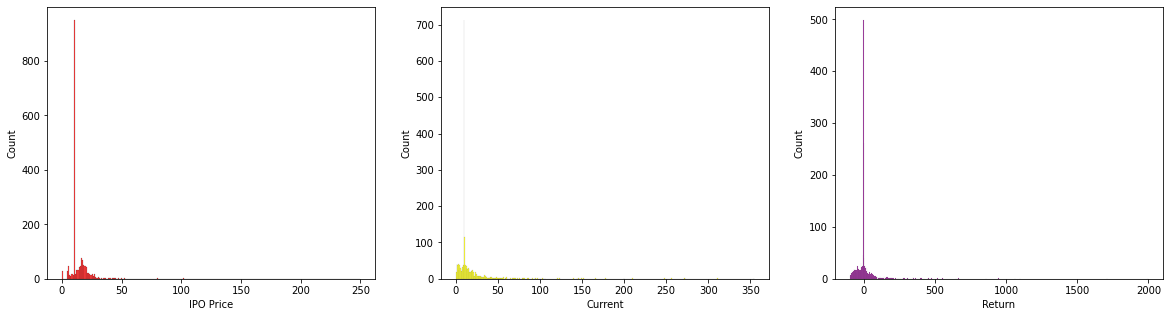

In [121]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3,figsize = (20,5))
s = sns.histplot(ax = ax1,x = data['IPO Price'],color = 'red')
s = sns.histplot(ax =ax2,x = data['Current'],color = 'yellow')
s = sns.histplot(ax = ax3,x = data['Return'],color = 'purple')

<Figure size 1080x576 with 0 Axes>

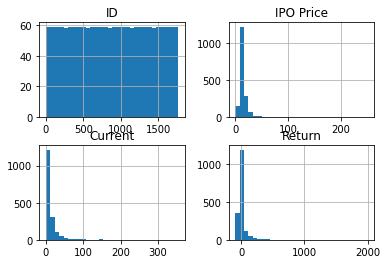

In [127]:
plt.figure(figsize = (15,8))
data.hist(bins = 30)
plt.show()

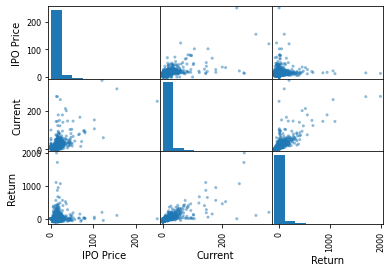

In [130]:
attributes = ['IPO Price','Current',"Return"]
scatter_matrix(data[attributes])
plt.show()

In [131]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Company Name'] = encoder.fit_transform(data['Company Name'])
data['Symbol'] = encoder.fit_transform(data['Symbol'])

In [132]:
data.head()

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,1.0,2021-12-21,1141,1128,10.0,10.03,0.3
1,2.0,2021-12-21,988,954,10.0,9.98,-0.2
2,3.0,2021-12-21,1382,1382,10.0,9.97,-0.3
3,4.0,2021-12-17,1314,1334,10.0,9.90,-1.0
4,5.0,2021-12-17,116,36,10.0,10.11,1.1


In [145]:
X = data.drop(columns = ['IPO Date','Current'],axis = 1)
Y = data['Current']

In [146]:
print(X)
print(Y)

          ID  Symbol  Company Name  IPO Price  Return
0        1.0    1141          1128       10.0    0.30
1        2.0     988           954       10.0   -0.20
2        3.0    1382          1382       10.0   -0.30
3        4.0    1314          1334       10.0   -1.00
4        5.0     116            36       10.0    1.10
...      ...     ...           ...        ...     ...
1760  1761.0    1312          1340       10.0    6.10
1761  1762.0     193             5       10.0    9.30
1762  1763.0    1031          1013        5.0  -61.80
1763  1764.0    1080          1016        4.0  -78.73
1764  1765.0    1517           364        4.0  -85.60

[1765 rows x 5 columns]
0       10.03
1        9.98
2        9.97
3        9.90
4       10.11
        ...  
1760    10.61
1761    10.93
1762     1.91
1763     0.85
1764     0.58
Name: Current, Length: 1765, dtype: float64


In [147]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [148]:
print(X.shape,X_train.shape,X_test.shape)

(1765, 5) (1412, 5) (353, 5)


In [150]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_transform = ss.fit_transform(X_train)
test_transform = ss.fit_transform(X_test)

In [151]:
print(train_transform)

[[-0.47803811  1.51161243  1.53179353  0.27762003 -0.75049276]
 [ 1.24175133 -0.34627646  0.41152209 -0.74013527 -0.84640837]
 [-0.01759105 -0.59439197 -0.51907377 -0.31607056 -0.14249283]
 ...
 [ 0.42711423 -0.41773373 -0.35508341 -0.31607056 -0.08594092]
 [-1.26709482 -0.65592461 -0.59020211 -0.31607056 -0.11933772]
 [ 0.35824394 -1.69999466 -1.63144206 -0.31607056 -0.08727679]]


In [160]:
model = KNeighborsRegressor()
model.fit(train_transform,Y_train)
train_prediction = model.predict(train_transform)
test_prediction = model.predict(test_transform)

In [161]:
score1 = metrics.r2_score(Y_train,train_prediction)

In [162]:
score2 = metrics.r2_score(Y_test,test_prediction)

In [163]:
print(score1,score2)

0.8931221591205951 0.5298608455255565


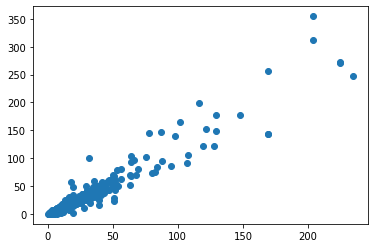

In [165]:
plt.scatter(x = train_prediction,y = Y_train)